# DIGESTIBILIDAD REGRESION LINEAL

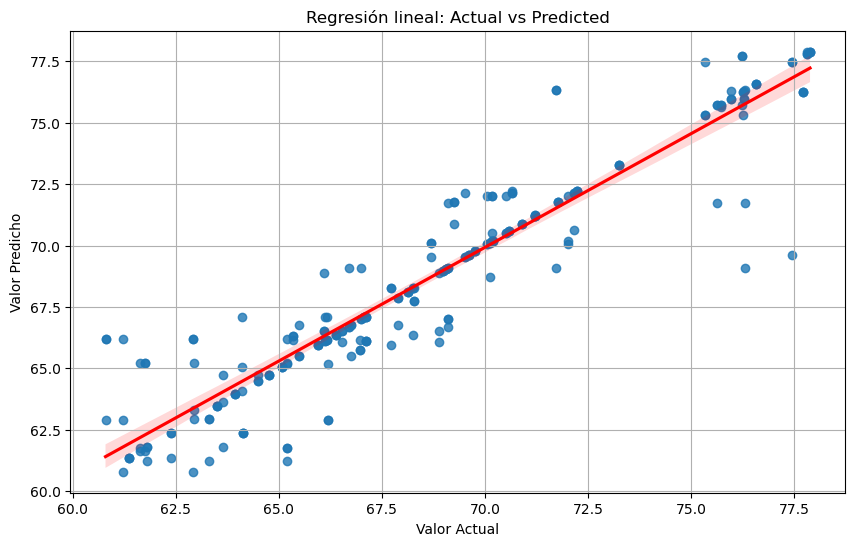

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos los datos
data = {
    "actual": [
        67.103, 70.187, 76.313, 70.163, 76.585, 76.585, 60.789, 72.006, 75.332, 63.936, 63.936, 68.279,
        61.224, 68.889, 76.280, 75.733, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        70.163, 67.103, 71.725, 76.241, 69.042, 70.583, 62.904, 73.262, 62.904, 67.106, 71.725, 63.485,
        61.795, 65.061, 67.880, 68.701, 61.621, 62.375, 66.992, 70.163, 68.701, 61.354, 70.522, 76.264,
        76.241, 76.280, 66.958, 66.688, 60.789, 76.585, 70.647, 66.992, 67.106, 62.929, 65.484, 64.746,
        70.053, 66.201, 61.621, 77.718, 69.769, 66.958, 66.755, 68.254, 76.241, 68.120, 77.457, 69.526,
        72.153, 70.163, 65.199, 71.770, 75.733, 71.225, 65.199, 63.639, 69.615, 63.298, 75.628, 66.085,
        69.042, 65.188, 65.484, 68.120, 61.354, 61.224, 64.746, 66.165, 65.188, 66.688, 69.240, 68.889,
        65.199, 72.224, 67.722, 77.718, 65.188, 67.722, 77.817, 71.214, 63.298, 66.375, 71.214, 62.375,
        70.647, 68.980, 71.725, 64.124, 70.116, 64.746, 76.313, 64.124, 68.120, 66.375, 67.103, 66.755,
        64.124, 70.187, 62.929, 65.484, 77.817, 69.526, 69.102, 75.970, 66.118, 63.639, 70.163, 77.817,
        73.262, 61.621, 61.749, 73.262, 70.891, 61.749, 64.502, 65.938, 70.116, 65.338, 77.890, 75.970,
        61.354, 66.524, 67.074, 68.279, 72.006, 75.628, 75.332, 70.053, 63.639, 69.615, 76.264, 63.485,
        75.628, 68.889, 68.254, 77.890, 69.769, 75.733, 63.936, 77.457, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 66.085, 63.298, 61.749, 69.094, 67.074, 68.980, 64.095, 65.338, 66.992,
        70.187, 66.201, 65.938, 65.061, 67.106, 75.332, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        69.094, 72.006, 66.958, 70.053, 68.279, 77.890, 66.085, 69.240, 70.163, 72.153, 65.338, 68.254,
        69.042, 70.116, 62.929, 76.280, 70.583, 69.240, 61.224, 62.904, 64.095, 71.770, 67.722, 71.214,
        66.201, 69.102, 69.094, 66.165, 68.701, 64.095, 63.485, 77.718, 60.789, 70.522, 65.061, 70.583,
        72.153, 69.526, 66.118, 67.880, 70.647, 69.102, 61.795, 66.118, 71.225, 64.502, 71.225, 69.769,
        66.688, 76.313, 76.264
    ],
    "predicted": [
        66.118, 70.187, 71.725, 70.163, 76.585, 76.585, 62.904, 70.163, 75.332, 63.936, 63.936, 67.722,
        62.904, 66.085, 75.970, 75.628, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        72.006, 66.118, 76.313, 75.733, 69.042, 70.583, 66.201, 73.262, 60.789, 67.106, 76.313, 63.485,
        61.224, 65.061, 67.880, 70.116, 61.749, 61.354, 66.992, 70.522, 69.526, 61.354, 70.522, 76.264,
        77.718, 76.280, 65.743, 69.094, 66.201, 76.585, 72.224, 69.094, 67.106, 62.929, 65.484, 64.746,
        72.006, 62.904, 65.199, 76.241, 69.769, 65.743, 65.484, 68.254, 77.718, 68.120, 77.457, 69.526,
        70.647, 70.163, 65.199, 71.770, 75.733, 71.214, 61.749, 63.639, 69.615, 62.929, 71.725, 66.524,
        69.042, 61.224, 65.484, 68.120, 61.354, 60.789, 64.746, 66.165, 66.201, 66.688, 71.770, 68.889,
        61.749, 72.224, 68.279, 76.241, 65.188, 65.938, 77.817, 71.214, 61.224, 66.375, 71.225, 62.375,
        72.153, 68.980, 69.102, 62.375, 70.116, 64.746, 69.102, 62.375, 68.120, 66.375, 66.118, 66.755,
        62.375, 70.187, 63.298, 66.755, 77.89, 72.153, 69.102, 76.280, 66.118, 64.746, 70.163, 77.817,
        73.262, 61.621, 65.199, 73.262, 70.891, 65.199, 64.746, 65.938, 68.701, 66.31, 77.890, 75.970,
        61.354, 66.085, 67.074, 67.722, 72.006, 75.733, 75.332, 70.053, 61.795, 69.615, 76.264, 63.485,
        75.733, 66.524, 66.375, 77.890, 69.769, 75.733, 63.936, 69.615, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 68.889, 62.929, 61.621, 66.992, 67.074, 68.980, 64.095, 66.148, 66.992,
        70.187, 62.904, 65.938, 65.061, 67.106, 77.457, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        66.992, 70.053, 66.148, 70.053, 68.279, 77.890, 66.524, 71.770, 72.006, 72.153, 66.31, 68.254,
        69.042, 70.116, 65.199, 75.970, 70.583, 70.891, 66.201, 66.201, 65.061, 71.770, 68.279, 71.225,
        65.188, 69.102, 66.688, 67.103, 70.116, 67.103, 63.485, 76.241, 66.201, 72.006, 65.061, 70.583,
        72.153, 69.526, 67.103, 66.755, 72.153, 71.725, 61.795, 66.118, 71.214, 64.502, 71.214, 69.769,
        66.688, 76.313, 75.332
    ]
}

df = pd.DataFrame(data)

# Graficamos
plt.figure(figsize=(10, 6))
sns.regplot(x="actual", y="predicted", data=df, line_kws={"color": "red"})
plt.title('Regresión lineal: Actual vs Predicted')
plt.xlabel('Valor Actual')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.show()

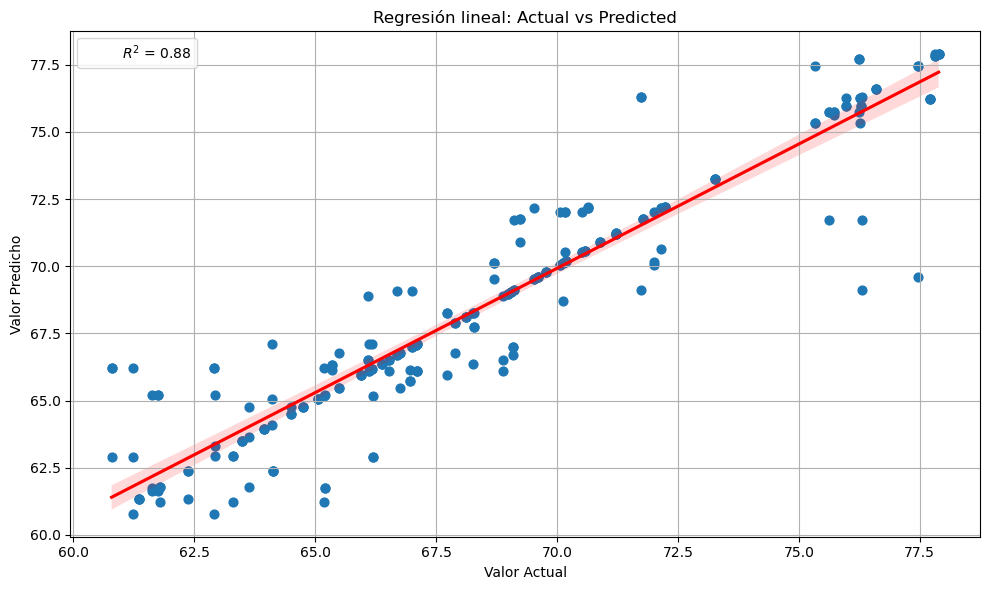

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos los datos
data = {
    "actual": [
        67.103, 70.187, 76.313, 70.163, 76.585, 76.585, 60.789, 72.006, 75.332, 63.936, 63.936, 68.279,
        61.224, 68.889, 76.280, 75.733, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        70.163, 67.103, 71.725, 76.241, 69.042, 70.583, 62.904, 73.262, 62.904, 67.106, 71.725, 63.485,
        61.795, 65.061, 67.880, 68.701, 61.621, 62.375, 66.992, 70.163, 68.701, 61.354, 70.522, 76.264,
        76.241, 76.280, 66.958, 66.688, 60.789, 76.585, 70.647, 66.992, 67.106, 62.929, 65.484, 64.746,
        70.053, 66.201, 61.621, 77.718, 69.769, 66.958, 66.755, 68.254, 76.241, 68.120, 77.457, 69.526,
        72.153, 70.163, 65.199, 71.770, 75.733, 71.225, 65.199, 63.639, 69.615, 63.298, 75.628, 66.085,
        69.042, 65.188, 65.484, 68.120, 61.354, 61.224, 64.746, 66.165, 65.188, 66.688, 69.240, 68.889,
        65.199, 72.224, 67.722, 77.718, 65.188, 67.722, 77.817, 71.214, 63.298, 66.375, 71.214, 62.375,
        70.647, 68.980, 71.725, 64.124, 70.116, 64.746, 76.313, 64.124, 68.120, 66.375, 67.103, 66.755,
        64.124, 70.187, 62.929, 65.484, 77.817, 69.526, 69.102, 75.970, 66.118, 63.639, 70.163, 77.817,
        73.262, 61.621, 61.749, 73.262, 70.891, 61.749, 64.502, 65.938, 70.116, 65.338, 77.890, 75.970,
        61.354, 66.524, 67.074, 68.279, 72.006, 75.628, 75.332, 70.053, 63.639, 69.615, 76.264, 63.485,
        75.628, 68.889, 68.254, 77.890, 69.769, 75.733, 63.936, 77.457, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 66.085, 63.298, 61.749, 69.094, 67.074, 68.980, 64.095, 65.338, 66.992,
        70.187, 66.201, 65.938, 65.061, 67.106, 75.332, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        69.094, 72.006, 66.958, 70.053, 68.279, 77.890, 66.085, 69.240, 70.163, 72.153, 65.338, 68.254,
        69.042, 70.116, 62.929, 76.280, 70.583, 69.240, 61.224, 62.904, 64.095, 71.770, 67.722, 71.214,
        66.201, 69.102, 69.094, 66.165, 68.701, 64.095, 63.485, 77.718, 60.789, 70.522, 65.061, 70.583,
        72.153, 69.526, 66.118, 67.880, 70.647, 69.102, 61.795, 66.118, 71.225, 64.502, 71.225, 69.769,
        66.688, 76.313, 76.264
    ],
    "predicted": [
        66.118, 70.187, 71.725, 70.163, 76.585, 76.585, 62.904, 70.163, 75.332, 63.936, 63.936, 67.722,
        62.904, 66.085, 75.970, 75.628, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        72.006, 66.118, 76.313, 75.733, 69.042, 70.583, 66.201, 73.262, 60.789, 67.106, 76.313, 63.485,
        61.224, 65.061, 67.880, 70.116, 61.749, 61.354, 66.992, 70.522, 69.526, 61.354, 70.522, 76.264,
        77.718, 76.280, 65.743, 69.094, 66.201, 76.585, 72.224, 69.094, 67.106, 62.929, 65.484, 64.746,
        72.006, 62.904, 65.199, 76.241, 69.769, 65.743, 65.484, 68.254, 77.718, 68.120, 77.457, 69.526,
        70.647, 70.163, 65.199, 71.770, 75.733, 71.214, 61.749, 63.639, 69.615, 62.929, 71.725, 66.524,
        69.042, 61.224, 65.484, 68.120, 61.354, 60.789, 64.746, 66.165, 66.201, 66.688, 71.770, 68.889,
        61.749, 72.224, 68.279, 76.241, 65.188, 65.938, 77.817, 71.214, 61.224, 66.375, 71.225, 62.375,
        72.153, 68.980, 69.102, 62.375, 70.116, 64.746, 69.102, 62.375, 68.120, 66.375, 66.118, 66.755,
        62.375, 70.187, 63.298, 66.755, 77.89, 72.153, 69.102, 76.280, 66.118, 64.746, 70.163, 77.817,
        73.262, 61.621, 65.199, 73.262, 70.891, 65.199, 64.746, 65.938, 68.701, 66.31, 77.890, 75.970,
        61.354, 66.085, 67.074, 67.722, 72.006, 75.733, 75.332, 70.053, 61.795, 69.615, 76.264, 63.485,
        75.733, 66.524, 66.375, 77.890, 69.769, 75.733, 63.936, 69.615, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 68.889, 62.929, 61.621, 66.992, 67.074, 68.980, 64.095, 66.148, 66.992,
        70.187, 62.904, 65.938, 65.061, 67.106, 77.457, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        66.992, 70.053, 66.148, 70.053, 68.279, 77.890, 66.524, 71.770, 72.006, 72.153, 66.31, 68.254,
        69.042, 70.116, 65.199, 75.970, 70.583, 70.891, 66.201, 66.201, 65.061, 71.770, 68.279, 71.225,
        65.188, 69.102, 66.688, 67.103, 70.116, 67.103, 63.485, 76.241, 66.201, 72.006, 65.061, 70.583,
        72.153, 69.526, 67.103, 66.755, 72.153, 71.725, 61.795, 66.118, 71.214, 64.502, 71.214, 69.769,
        66.688, 76.313, 75.332
    ]
}

df = pd.DataFrame(data)
# Cálculo de la regresión
coef = np.polyfit(df["actual"], df["predicted"], deg=1)
poly1d_fn = np.poly1d(coef)

# Cálculo de R²
correlation_matrix = np.corrcoef(df["actual"], df["predicted"])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

# Gráfica
plt.figure(figsize=(10, 6))

# Scatter y línea de regresión
sns.regplot(x="actual", y="predicted", data=df, 
            scatter_kws={"s": 40, "alpha": 1},  # puntos no transparentes
            line_kws={"color": "red"})

# Texto del R² en la leyenda
plt.plot([], [], ' ', label=f"$R^2$ = {r_squared:.2f}")

# Leyenda
legend = plt.legend(frameon=True, loc="upper left")
for text in legend.get_texts():
    text.set_color("black")  # que no tome el color rojo de la línea

# Etiquetas y título
plt.title('Regresión lineal: Actual vs Predicted')
plt.xlabel('Valor Actual')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.tight_layout()

plt.show()

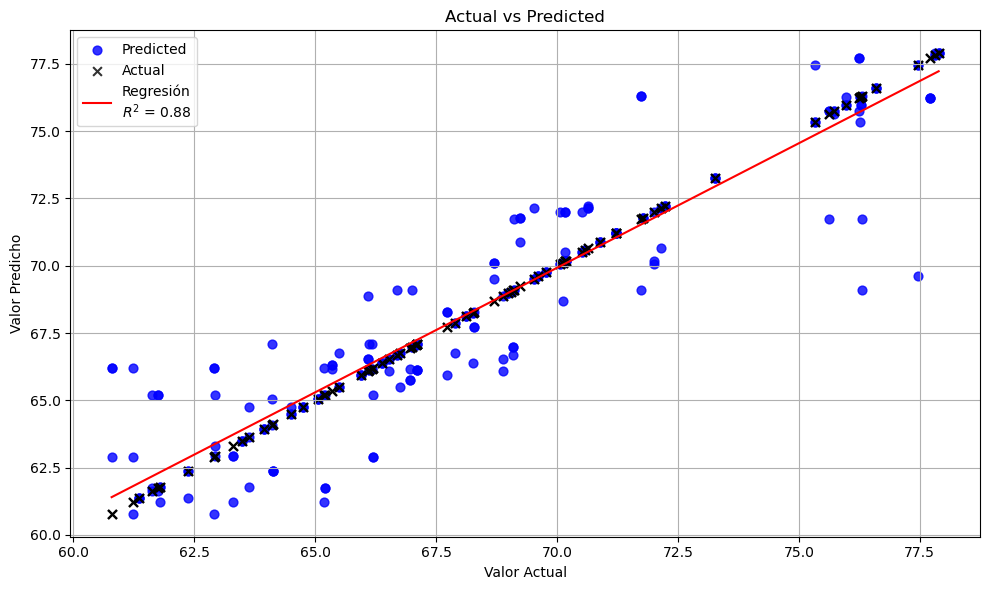

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos los datos
data = {
    "actual": [
        67.103, 70.187, 76.313, 70.163, 76.585, 76.585, 60.789, 72.006, 75.332, 63.936, 63.936, 68.279,
        61.224, 68.889, 76.280, 75.733, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        70.163, 67.103, 71.725, 76.241, 69.042, 70.583, 62.904, 73.262, 62.904, 67.106, 71.725, 63.485,
        61.795, 65.061, 67.880, 68.701, 61.621, 62.375, 66.992, 70.163, 68.701, 61.354, 70.522, 76.264,
        76.241, 76.280, 66.958, 66.688, 60.789, 76.585, 70.647, 66.992, 67.106, 62.929, 65.484, 64.746,
        70.053, 66.201, 61.621, 77.718, 69.769, 66.958, 66.755, 68.254, 76.241, 68.120, 77.457, 69.526,
        72.153, 70.163, 65.199, 71.770, 75.733, 71.225, 65.199, 63.639, 69.615, 63.298, 75.628, 66.085,
        69.042, 65.188, 65.484, 68.120, 61.354, 61.224, 64.746, 66.165, 65.188, 66.688, 69.240, 68.889,
        65.199, 72.224, 67.722, 77.718, 65.188, 67.722, 77.817, 71.214, 63.298, 66.375, 71.214, 62.375,
        70.647, 68.980, 71.725, 64.124, 70.116, 64.746, 76.313, 64.124, 68.120, 66.375, 67.103, 66.755,
        64.124, 70.187, 62.929, 65.484, 77.817, 69.526, 69.102, 75.970, 66.118, 63.639, 70.163, 77.817,
        73.262, 61.621, 61.749, 73.262, 70.891, 61.749, 64.502, 65.938, 70.116, 65.338, 77.890, 75.970,
        61.354, 66.524, 67.074, 68.279, 72.006, 75.628, 75.332, 70.053, 63.639, 69.615, 76.264, 63.485,
        75.628, 68.889, 68.254, 77.890, 69.769, 75.733, 63.936, 77.457, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 66.085, 63.298, 61.749, 69.094, 67.074, 68.980, 64.095, 65.338, 66.992,
        70.187, 66.201, 65.938, 65.061, 67.106, 75.332, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        69.094, 72.006, 66.958, 70.053, 68.279, 77.890, 66.085, 69.240, 70.163, 72.153, 65.338, 68.254,
        69.042, 70.116, 62.929, 76.280, 70.583, 69.240, 61.224, 62.904, 64.095, 71.770, 67.722, 71.214,
        66.201, 69.102, 69.094, 66.165, 68.701, 64.095, 63.485, 77.718, 60.789, 70.522, 65.061, 70.583,
        72.153, 69.526, 66.118, 67.880, 70.647, 69.102, 61.795, 66.118, 71.225, 64.502, 71.225, 69.769,
        66.688, 76.313, 76.264
    ],
    "predicted": [
        66.118, 70.187, 71.725, 70.163, 76.585, 76.585, 62.904, 70.163, 75.332, 63.936, 63.936, 67.722,
        62.904, 66.085, 75.970, 75.628, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        72.006, 66.118, 76.313, 75.733, 69.042, 70.583, 66.201, 73.262, 60.789, 67.106, 76.313, 63.485,
        61.224, 65.061, 67.880, 70.116, 61.749, 61.354, 66.992, 70.522, 69.526, 61.354, 70.522, 76.264,
        77.718, 76.280, 65.743, 69.094, 66.201, 76.585, 72.224, 69.094, 67.106, 62.929, 65.484, 64.746,
        72.006, 62.904, 65.199, 76.241, 69.769, 65.743, 65.484, 68.254, 77.718, 68.120, 77.457, 69.526,
        70.647, 70.163, 65.199, 71.770, 75.733, 71.214, 61.749, 63.639, 69.615, 62.929, 71.725, 66.524,
        69.042, 61.224, 65.484, 68.120, 61.354, 60.789, 64.746, 66.165, 66.201, 66.688, 71.770, 68.889,
        61.749, 72.224, 68.279, 76.241, 65.188, 65.938, 77.817, 71.214, 61.224, 66.375, 71.225, 62.375,
        72.153, 68.980, 69.102, 62.375, 70.116, 64.746, 69.102, 62.375, 68.120, 66.375, 66.118, 66.755,
        62.375, 70.187, 63.298, 66.755, 77.89, 72.153, 69.102, 76.280, 66.118, 64.746, 70.163, 77.817,
        73.262, 61.621, 65.199, 73.262, 70.891, 65.199, 64.746, 65.938, 68.701, 66.31, 77.890, 75.970,
        61.354, 66.085, 67.074, 67.722, 72.006, 75.733, 75.332, 70.053, 61.795, 69.615, 76.264, 63.485,
        75.733, 66.524, 66.375, 77.890, 69.769, 75.733, 63.936, 69.615, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 68.889, 62.929, 61.621, 66.992, 67.074, 68.980, 64.095, 66.148, 66.992,
        70.187, 62.904, 65.938, 65.061, 67.106, 77.457, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        66.992, 70.053, 66.148, 70.053, 68.279, 77.890, 66.524, 71.770, 72.006, 72.153, 66.31, 68.254,
        69.042, 70.116, 65.199, 75.970, 70.583, 70.891, 66.201, 66.201, 65.061, 71.770, 68.279, 71.225,
        65.188, 69.102, 66.688, 67.103, 70.116, 67.103, 63.485, 76.241, 66.201, 72.006, 65.061, 70.583,
        72.153, 69.526, 67.103, 66.755, 72.153, 71.725, 61.795, 66.118, 71.214, 64.502, 71.214, 69.769,
        66.688, 76.313, 75.332
    ]
}

df = pd.DataFrame(data)
# Cálculo de la regresión
coef = np.polyfit(df["actual"], df["predicted"], deg=1)
poly1d_fn = np.poly1d(coef)

# Cálculo de R²
correlation_matrix = np.corrcoef(df["actual"], df["predicted"])
correlation_xy = correlation_matrix[0, 1]
r_squared = correlation_xy ** 2

# Gráfica
plt.figure(figsize=(10, 6))

# Scatter plot separado con diferentes markers
plt.scatter(df["actual"], df["predicted"], label="Predicted", marker="o", color="blue", s=40, alpha=0.8)
plt.scatter(df["actual"], df["actual"], label="Actual", marker="x", color="black", s=40, alpha=0.8)

# Línea de regresión
x_vals = np.linspace(df["actual"].min(), df["actual"].max(), 100)
plt.plot(x_vals, poly1d_fn(x_vals), color="red", label=f"Regresión\n$R^2$ = {r_squared:.2f}")

# Leyenda
plt.legend(frameon=True, loc="upper left")

# Etiquetas y título
plt.title('Actual vs Predicted')
plt.xlabel('Valor Actual')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.tight_layout()

plt.show()

In [5]:
cd Escritorio/homero/homero/

/home/marcos/Escritorio/homero/homero


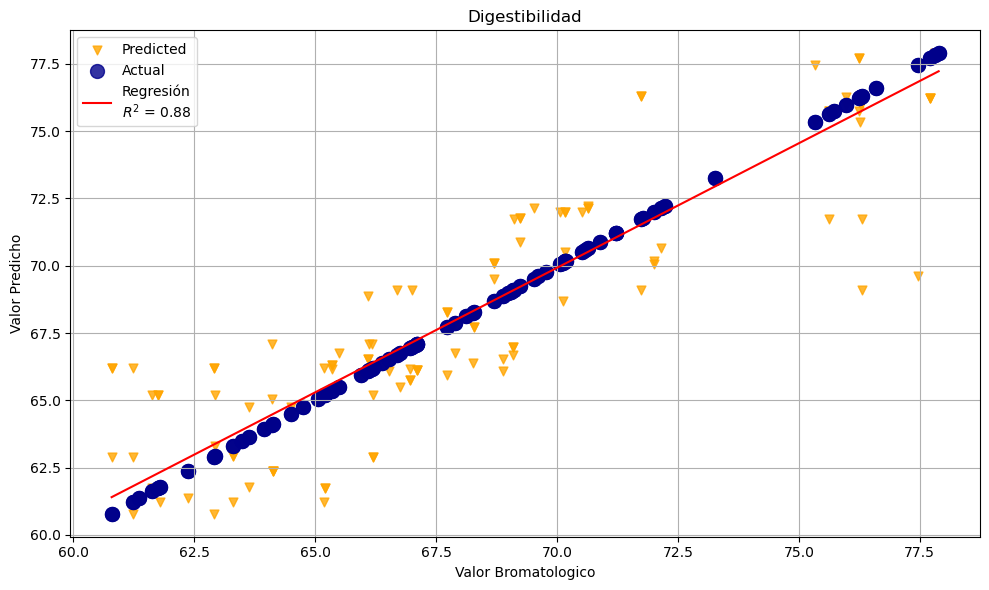

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos los datos
data = {
    "actual": [
        67.103, 70.187, 76.313, 70.163, 76.585, 76.585, 60.789, 72.006, 75.332, 63.936, 63.936, 68.279,
        61.224, 68.889, 76.280, 75.733, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        70.163, 67.103, 71.725, 76.241, 69.042, 70.583, 62.904, 73.262, 62.904, 67.106, 71.725, 63.485,
        61.795, 65.061, 67.880, 68.701, 61.621, 62.375, 66.992, 70.163, 68.701, 61.354, 70.522, 76.264,
        76.241, 76.280, 66.958, 66.688, 60.789, 76.585, 70.647, 66.992, 67.106, 62.929, 65.484, 64.746,
        70.053, 66.201, 61.621, 77.718, 69.769, 66.958, 66.755, 68.254, 76.241, 68.120, 77.457, 69.526,
        72.153, 70.163, 65.199, 71.770, 75.733, 71.225, 65.199, 63.639, 69.615, 63.298, 75.628, 66.085,
        69.042, 65.188, 65.484, 68.120, 61.354, 61.224, 64.746, 66.165, 65.188, 66.688, 69.240, 68.889,
        65.199, 72.224, 67.722, 77.718, 65.188, 67.722, 77.817, 71.214, 63.298, 66.375, 71.214, 62.375,
        70.647, 68.980, 71.725, 64.124, 70.116, 64.746, 76.313, 64.124, 68.120, 66.375, 67.103, 66.755,
        64.124, 70.187, 62.929, 65.484, 77.817, 69.526, 69.102, 75.970, 66.118, 63.639, 70.163, 77.817,
        73.262, 61.621, 61.749, 73.262, 70.891, 61.749, 64.502, 65.938, 70.116, 65.338, 77.890, 75.970,
        61.354, 66.524, 67.074, 68.279, 72.006, 75.628, 75.332, 70.053, 63.639, 69.615, 76.264, 63.485,
        75.628, 68.889, 68.254, 77.890, 69.769, 75.733, 63.936, 77.457, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 66.085, 63.298, 61.749, 69.094, 67.074, 68.980, 64.095, 65.338, 66.992,
        70.187, 66.201, 65.938, 65.061, 67.106, 75.332, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        69.094, 72.006, 66.958, 70.053, 68.279, 77.890, 66.085, 69.240, 70.163, 72.153, 65.338, 68.254,
        69.042, 70.116, 62.929, 76.280, 70.583, 69.240, 61.224, 62.904, 64.095, 71.770, 67.722, 71.214,
        66.201, 69.102, 69.094, 66.165, 68.701, 64.095, 63.485, 77.718, 60.789, 70.522, 65.061, 70.583,
        72.153, 69.526, 66.118, 67.880, 70.647, 69.102, 61.795, 66.118, 71.225, 64.502, 71.225, 69.769,
        66.688, 76.313, 76.264
    ],
    "predicted": [
        66.118, 70.187, 71.725, 70.163, 76.585, 76.585, 62.904, 70.163, 75.332, 63.936, 63.936, 67.722,
        62.904, 66.085, 75.970, 75.628, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        72.006, 66.118, 76.313, 75.733, 69.042, 70.583, 66.201, 73.262, 60.789, 67.106, 76.313, 63.485,
        61.224, 65.061, 67.880, 70.116, 61.749, 61.354, 66.992, 70.522, 69.526, 61.354, 70.522, 76.264,
        77.718, 76.280, 65.743, 69.094, 66.201, 76.585, 72.224, 69.094, 67.106, 62.929, 65.484, 64.746,
        72.006, 62.904, 65.199, 76.241, 69.769, 65.743, 65.484, 68.254, 77.718, 68.120, 77.457, 69.526,
        70.647, 70.163, 65.199, 71.770, 75.733, 71.214, 61.749, 63.639, 69.615, 62.929, 71.725, 66.524,
        69.042, 61.224, 65.484, 68.120, 61.354, 60.789, 64.746, 66.165, 66.201, 66.688, 71.770, 68.889,
        61.749, 72.224, 68.279, 76.241, 65.188, 65.938, 77.817, 71.214, 61.224, 66.375, 71.225, 62.375,
        72.153, 68.980, 69.102, 62.375, 70.116, 64.746, 69.102, 62.375, 68.120, 66.375, 66.118, 66.755,
        62.375, 70.187, 63.298, 66.755, 77.89, 72.153, 69.102, 76.280, 66.118, 64.746, 70.163, 77.817,
        73.262, 61.621, 65.199, 73.262, 70.891, 65.199, 64.746, 65.938, 68.701, 66.31, 77.890, 75.970,
        61.354, 66.085, 67.074, 67.722, 72.006, 75.733, 75.332, 70.053, 61.795, 69.615, 76.264, 63.485,
        75.733, 66.524, 66.375, 77.890, 69.769, 75.733, 63.936, 69.615, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 68.889, 62.929, 61.621, 66.992, 67.074, 68.980, 64.095, 66.148, 66.992,
        70.187, 62.904, 65.938, 65.061, 67.106, 77.457, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        66.992, 70.053, 66.148, 70.053, 68.279, 77.890, 66.524, 71.770, 72.006, 72.153, 66.31, 68.254,
        69.042, 70.116, 65.199, 75.970, 70.583, 70.891, 66.201, 66.201, 65.061, 71.770, 68.279, 71.225,
        65.188, 69.102, 66.688, 67.103, 70.116, 67.103, 63.485, 76.241, 66.201, 72.006, 65.061, 70.583,
        72.153, 69.526, 67.103, 66.755, 72.153, 71.725, 61.795, 66.118, 71.214, 64.502, 71.214, 69.769,
        66.688, 76.313, 75.332
    ]
}

df = pd.DataFrame(data)
# Cálculo de la regresión
coef = np.polyfit(df["actual"], df["predicted"], deg=1)
poly1d_fn = np.poly1d(coef)

# Cálculo de R²
correlation_matrix = np.corrcoef(df["actual"], df["predicted"])
correlation_xy = correlation_matrix[0, 1]
r_squared = correlation_xy ** 2

# Gráfica
plt.figure(figsize=(10, 6))

# Scatter plot separado con diferentes markers
plt.scatter(df["actual"], df["predicted"], label="Predicted", marker="v", color="orange", s=40, alpha=0.8)
plt.scatter(df["actual"], df["actual"], label="Actual", marker="o", color="darkblue", s=100, alpha=0.8)

# Línea de regresión
x_vals = np.linspace(df["actual"].min(), df["actual"].max(), 100)
plt.plot(x_vals, poly1d_fn(x_vals), color="red", label=f"Regresión\n$R^2$ = {r_squared:.2f}")

# Leyenda
plt.legend(frameon=True, loc="upper left")

# Etiquetas y título
plt.title('Digestibilidad')
plt.xlabel('Valor Bromatologico')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.tight_layout()

plt.show()

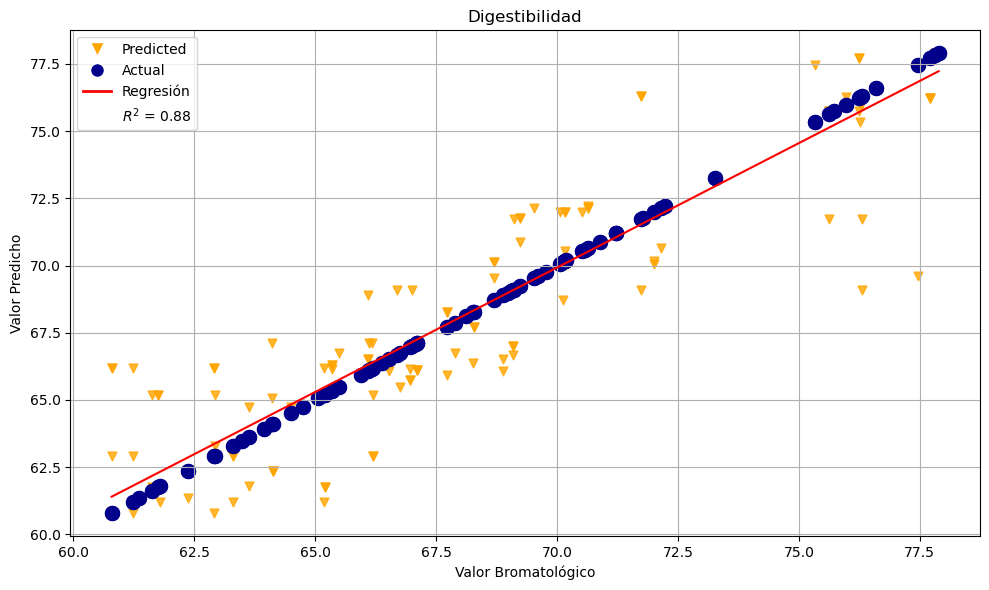

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Creamos los datos
data = {
    "actual": [
        67.103, 70.187, 76.313, 70.163, 76.585, 76.585, 60.789, 72.006, 75.332, 63.936, 63.936, 68.279,
        61.224, 68.889, 76.280, 75.733, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        70.163, 67.103, 71.725, 76.241, 69.042, 70.583, 62.904, 73.262, 62.904, 67.106, 71.725, 63.485,
        61.795, 65.061, 67.880, 68.701, 61.621, 62.375, 66.992, 70.163, 68.701, 61.354, 70.522, 76.264,
        76.241, 76.280, 66.958, 66.688, 60.789, 76.585, 70.647, 66.992, 67.106, 62.929, 65.484, 64.746,
        70.053, 66.201, 61.621, 77.718, 69.769, 66.958, 66.755, 68.254, 76.241, 68.120, 77.457, 69.526,
        72.153, 70.163, 65.199, 71.770, 75.733, 71.225, 65.199, 63.639, 69.615, 63.298, 75.628, 66.085,
        69.042, 65.188, 65.484, 68.120, 61.354, 61.224, 64.746, 66.165, 65.188, 66.688, 69.240, 68.889,
        65.199, 72.224, 67.722, 77.718, 65.188, 67.722, 77.817, 71.214, 63.298, 66.375, 71.214, 62.375,
        70.647, 68.980, 71.725, 64.124, 70.116, 64.746, 76.313, 64.124, 68.120, 66.375, 67.103, 66.755,
        64.124, 70.187, 62.929, 65.484, 77.817, 69.526, 69.102, 75.970, 66.118, 63.639, 70.163, 77.817,
        73.262, 61.621, 61.749, 73.262, 70.891, 61.749, 64.502, 65.938, 70.116, 65.338, 77.890, 75.970,
        61.354, 66.524, 67.074, 68.279, 72.006, 75.628, 75.332, 70.053, 63.639, 69.615, 76.264, 63.485,
        75.628, 68.889, 68.254, 77.890, 69.769, 75.733, 63.936, 77.457, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 66.085, 63.298, 61.749, 69.094, 67.074, 68.980, 64.095, 65.338, 66.992,
        70.187, 66.201, 65.938, 65.061, 67.106, 75.332, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        69.094, 72.006, 66.958, 70.053, 68.279, 77.890, 66.085, 69.240, 70.163, 72.153, 65.338, 68.254,
        69.042, 70.116, 62.929, 76.280, 70.583, 69.240, 61.224, 62.904, 64.095, 71.770, 67.722, 71.214,
        66.201, 69.102, 69.094, 66.165, 68.701, 64.095, 63.485, 77.718, 60.789, 70.522, 65.061, 70.583,
        72.153, 69.526, 66.118, 67.880, 70.647, 69.102, 61.795, 66.118, 71.225, 64.502, 71.225, 69.769,
        66.688, 76.313, 76.264
    ],
    "predicted": [
        66.118, 70.187, 71.725, 70.163, 76.585, 76.585, 62.904, 70.163, 75.332, 63.936, 63.936, 67.722,
        62.904, 66.085, 75.970, 75.628, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        72.006, 66.118, 76.313, 75.733, 69.042, 70.583, 66.201, 73.262, 60.789, 67.106, 76.313, 63.485,
        61.224, 65.061, 67.880, 70.116, 61.749, 61.354, 66.992, 70.522, 69.526, 61.354, 70.522, 76.264,
        77.718, 76.280, 65.743, 69.094, 66.201, 76.585, 72.224, 69.094, 67.106, 62.929, 65.484, 64.746,
        72.006, 62.904, 65.199, 76.241, 69.769, 65.743, 65.484, 68.254, 77.718, 68.120, 77.457, 69.526,
        70.647, 70.163, 65.199, 71.770, 75.733, 71.214, 61.749, 63.639, 69.615, 62.929, 71.725, 66.524,
        69.042, 61.224, 65.484, 68.120, 61.354, 60.789, 64.746, 66.165, 66.201, 66.688, 71.770, 68.889,
        61.749, 72.224, 68.279, 76.241, 65.188, 65.938, 77.817, 71.214, 61.224, 66.375, 71.225, 62.375,
        72.153, 68.980, 69.102, 62.375, 70.116, 64.746, 69.102, 62.375, 68.120, 66.375, 66.118, 66.755,
        62.375, 70.187, 63.298, 66.755, 77.89, 72.153, 69.102, 76.280, 66.118, 64.746, 70.163, 77.817,
        73.262, 61.621, 65.199, 73.262, 70.891, 65.199, 64.746, 65.938, 68.701, 66.31, 77.890, 75.970,
        61.354, 66.085, 67.074, 67.722, 72.006, 75.733, 75.332, 70.053, 61.795, 69.615, 76.264, 63.485,
        75.733, 66.524, 66.375, 77.890, 69.769, 75.733, 63.936, 69.615, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 68.889, 62.929, 61.621, 66.992, 67.074, 68.980, 64.095, 66.148, 66.992,
        70.187, 62.904, 65.938, 65.061, 67.106, 77.457, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        66.992, 70.053, 66.148, 70.053, 68.279, 77.890, 66.524, 71.770, 72.006, 72.153, 66.31, 68.254,
        69.042, 70.116, 65.199, 75.970, 70.583, 70.891, 66.201, 66.201, 65.061, 71.770, 68.279, 71.225,
        65.188, 69.102, 66.688, 67.103, 70.116, 67.103, 63.485, 76.241, 66.201, 72.006, 65.061, 70.583,
        72.153, 69.526, 67.103, 66.755, 72.153, 71.725, 61.795, 66.118, 71.214, 64.502, 71.214, 69.769,
        66.688, 76.313, 75.332
    ]
}

df = pd.DataFrame(data)
# Cálculo de la regresión
coef = np.polyfit(df["actual"], df["predicted"], deg=1)
poly1d_fn = np.poly1d(coef)

# Cálculo de R²
correlation_matrix = np.corrcoef(df["actual"], df["predicted"])
correlation_xy = correlation_matrix[0, 1]
r_squared = correlation_xy ** 2

# Gráfica
plt.figure(figsize=(10, 6))

# Scatter plots
plt.scatter(df["actual"], df["predicted"], label="Predicted", marker="v", color="orange", s=40, alpha=0.8)
plt.scatter(df["actual"], df["actual"], label="Actual", marker="o", color="darkblue", s=100, alpha=0.8)

# Línea de regresión
x_vals = np.linspace(df["actual"].min(), df["actual"].max(), 100)
linea_regresion, = plt.plot(x_vals, poly1d_fn(x_vals), color="red", label="Regresión")

# Handles personalizados
handles = [
    Line2D([0], [0], marker='v', color='w', label='Predicted', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='darkblue', markersize=10),
    Line2D([0], [0], color='red', lw=2, label='Regresión'),
    Line2D([0], [0], color='green', lw=0, marker='', label=f'$R^2$ = {r_squared:.2f}')  # R2 en verde
]

# Leyenda
plt.legend(handles=handles, frameon=True, loc="upper left")

# Etiquetas y título
plt.title('Digestibilidad')
plt.xlabel('Valor Bromatológico')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.tight_layout()

plt.show()

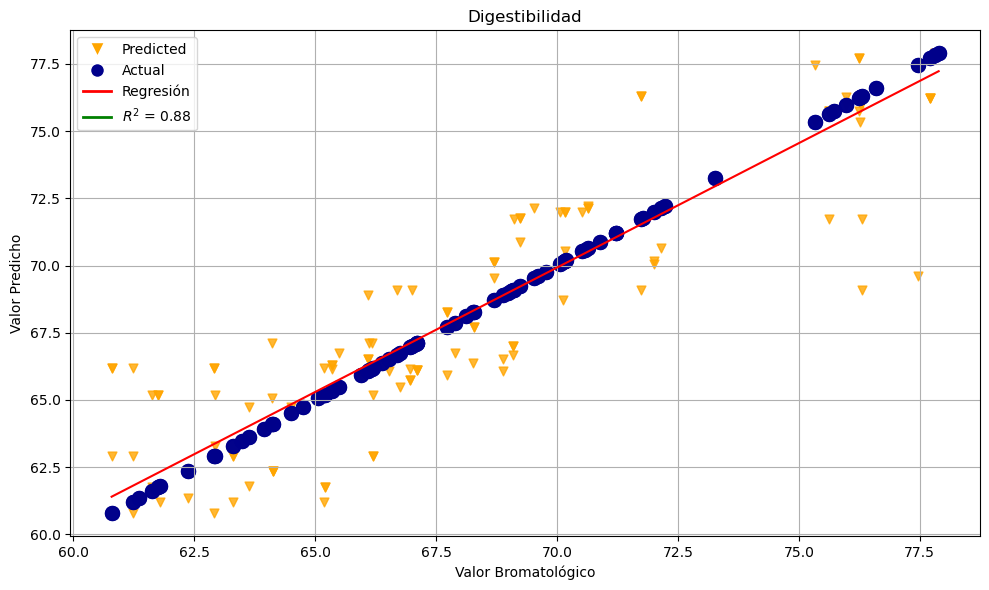

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Creamos los datos
data = {
    "actual": [
        67.103, 70.187, 76.313, 70.163, 76.585, 76.585, 60.789, 72.006, 75.332, 63.936, 63.936, 68.279,
        61.224, 68.889, 76.280, 75.733, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        70.163, 67.103, 71.725, 76.241, 69.042, 70.583, 62.904, 73.262, 62.904, 67.106, 71.725, 63.485,
        61.795, 65.061, 67.880, 68.701, 61.621, 62.375, 66.992, 70.163, 68.701, 61.354, 70.522, 76.264,
        76.241, 76.280, 66.958, 66.688, 60.789, 76.585, 70.647, 66.992, 67.106, 62.929, 65.484, 64.746,
        70.053, 66.201, 61.621, 77.718, 69.769, 66.958, 66.755, 68.254, 76.241, 68.120, 77.457, 69.526,
        72.153, 70.163, 65.199, 71.770, 75.733, 71.225, 65.199, 63.639, 69.615, 63.298, 75.628, 66.085,
        69.042, 65.188, 65.484, 68.120, 61.354, 61.224, 64.746, 66.165, 65.188, 66.688, 69.240, 68.889,
        65.199, 72.224, 67.722, 77.718, 65.188, 67.722, 77.817, 71.214, 63.298, 66.375, 71.214, 62.375,
        70.647, 68.980, 71.725, 64.124, 70.116, 64.746, 76.313, 64.124, 68.120, 66.375, 67.103, 66.755,
        64.124, 70.187, 62.929, 65.484, 77.817, 69.526, 69.102, 75.970, 66.118, 63.639, 70.163, 77.817,
        73.262, 61.621, 61.749, 73.262, 70.891, 61.749, 64.502, 65.938, 70.116, 65.338, 77.890, 75.970,
        61.354, 66.524, 67.074, 68.279, 72.006, 75.628, 75.332, 70.053, 63.639, 69.615, 76.264, 63.485,
        75.628, 68.889, 68.254, 77.890, 69.769, 75.733, 63.936, 77.457, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 66.085, 63.298, 61.749, 69.094, 67.074, 68.980, 64.095, 65.338, 66.992,
        70.187, 66.201, 65.938, 65.061, 67.106, 75.332, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        69.094, 72.006, 66.958, 70.053, 68.279, 77.890, 66.085, 69.240, 70.163, 72.153, 65.338, 68.254,
        69.042, 70.116, 62.929, 76.280, 70.583, 69.240, 61.224, 62.904, 64.095, 71.770, 67.722, 71.214,
        66.201, 69.102, 69.094, 66.165, 68.701, 64.095, 63.485, 77.718, 60.789, 70.522, 65.061, 70.583,
        72.153, 69.526, 66.118, 67.880, 70.647, 69.102, 61.795, 66.118, 71.225, 64.502, 71.225, 69.769,
        66.688, 76.313, 76.264
    ],
    "predicted": [
        66.118, 70.187, 71.725, 70.163, 76.585, 76.585, 62.904, 70.163, 75.332, 63.936, 63.936, 67.722,
        62.904, 66.085, 75.970, 75.628, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        72.006, 66.118, 76.313, 75.733, 69.042, 70.583, 66.201, 73.262, 60.789, 67.106, 76.313, 63.485,
        61.224, 65.061, 67.880, 70.116, 61.749, 61.354, 66.992, 70.522, 69.526, 61.354, 70.522, 76.264,
        77.718, 76.280, 65.743, 69.094, 66.201, 76.585, 72.224, 69.094, 67.106, 62.929, 65.484, 64.746,
        72.006, 62.904, 65.199, 76.241, 69.769, 65.743, 65.484, 68.254, 77.718, 68.120, 77.457, 69.526,
        70.647, 70.163, 65.199, 71.770, 75.733, 71.214, 61.749, 63.639, 69.615, 62.929, 71.725, 66.524,
        69.042, 61.224, 65.484, 68.120, 61.354, 60.789, 64.746, 66.165, 66.201, 66.688, 71.770, 68.889,
        61.749, 72.224, 68.279, 76.241, 65.188, 65.938, 77.817, 71.214, 61.224, 66.375, 71.225, 62.375,
        72.153, 68.980, 69.102, 62.375, 70.116, 64.746, 69.102, 62.375, 68.120, 66.375, 66.118, 66.755,
        62.375, 70.187, 63.298, 66.755, 77.89, 72.153, 69.102, 76.280, 66.118, 64.746, 70.163, 77.817,
        73.262, 61.621, 65.199, 73.262, 70.891, 65.199, 64.746, 65.938, 68.701, 66.31, 77.890, 75.970,
        61.354, 66.085, 67.074, 67.722, 72.006, 75.733, 75.332, 70.053, 61.795, 69.615, 76.264, 63.485,
        75.733, 66.524, 66.375, 77.890, 69.769, 75.733, 63.936, 69.615, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 68.889, 62.929, 61.621, 66.992, 67.074, 68.980, 64.095, 66.148, 66.992,
        70.187, 62.904, 65.938, 65.061, 67.106, 77.457, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        66.992, 70.053, 66.148, 70.053, 68.279, 77.890, 66.524, 71.770, 72.006, 72.153, 66.31, 68.254,
        69.042, 70.116, 65.199, 75.970, 70.583, 70.891, 66.201, 66.201, 65.061, 71.770, 68.279, 71.225,
        65.188, 69.102, 66.688, 67.103, 70.116, 67.103, 63.485, 76.241, 66.201, 72.006, 65.061, 70.583,
        72.153, 69.526, 67.103, 66.755, 72.153, 71.725, 61.795, 66.118, 71.214, 64.502, 71.214, 69.769,
        66.688, 76.313, 75.332
    ]
}


df = pd.DataFrame(data)

# Cálculo de la regresión
coef = np.polyfit(df["actual"], df["predicted"], deg=1)
poly1d_fn = np.poly1d(coef)

# Cálculo de R²
correlation_matrix = np.corrcoef(df["actual"], df["predicted"])
correlation_xy = correlation_matrix[0, 1]
r_squared = correlation_xy ** 2

# Gráfica
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df["actual"], df["predicted"], label="Predicted", marker="v", color="orange", s=40, alpha=0.8)
plt.scatter(df["actual"], df["actual"], label="Actual", marker="o", color="darkblue", s=100, alpha=0.8)

# Línea de regresión
x_vals = np.linspace(df["actual"].min(), df["actual"].max(), 100)
plt.plot(x_vals, poly1d_fn(x_vals), color="red", label="Regresión")  # Solo "Regresión", sin $R^2$ aquí

# Crear ítems manuales de la leyenda
legend_elements = [
    Line2D([0], [0], marker='v', color='w', label='Predicted', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='darkblue', markersize=10),
    Line2D([0], [0], color='red', lw=2, label='Regresión'),
    Line2D([0], [0], color='green', lw=2, label=f'$R^2$ = {r_squared:.2f}')  # Coeficiente en verde
]

plt.legend(handles=legend_elements, frameon=True, loc="upper left")

# Etiquetas y título
plt.title('Digestibilidad')
plt.xlabel('Valor Bromatológico')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.tight_layout()
plt.savefig("DIGESTIBILIDAD_FINISH_001.png", dpi=500, bbox_inches='tight')  
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


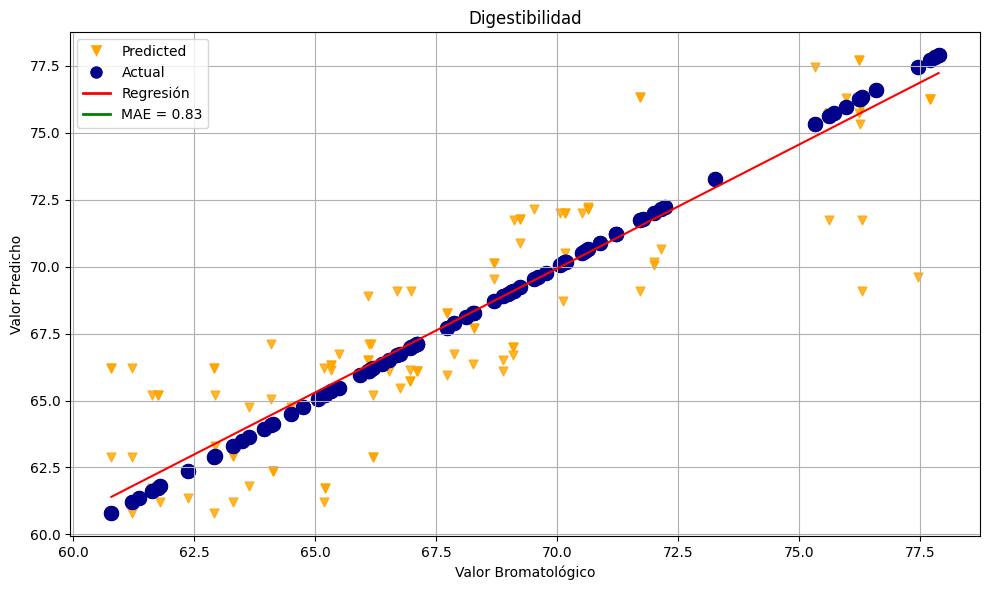

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Creamos los datos
data = {
    "actual": [
        67.103, 70.187, 76.313, 70.163, 76.585, 76.585, 60.789, 72.006, 75.332, 63.936, 63.936, 68.279,
        61.224, 68.889, 76.280, 75.733, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        70.163, 67.103, 71.725, 76.241, 69.042, 70.583, 62.904, 73.262, 62.904, 67.106, 71.725, 63.485,
        61.795, 65.061, 67.880, 68.701, 61.621, 62.375, 66.992, 70.163, 68.701, 61.354, 70.522, 76.264,
        76.241, 76.280, 66.958, 66.688, 60.789, 76.585, 70.647, 66.992, 67.106, 62.929, 65.484, 64.746,
        70.053, 66.201, 61.621, 77.718, 69.769, 66.958, 66.755, 68.254, 76.241, 68.120, 77.457, 69.526,
        72.153, 70.163, 65.199, 71.770, 75.733, 71.225, 65.199, 63.639, 69.615, 63.298, 75.628, 66.085,
        69.042, 65.188, 65.484, 68.120, 61.354, 61.224, 64.746, 66.165, 65.188, 66.688, 69.240, 68.889,
        65.199, 72.224, 67.722, 77.718, 65.188, 67.722, 77.817, 71.214, 63.298, 66.375, 71.214, 62.375,
        70.647, 68.980, 71.725, 64.124, 70.116, 64.746, 76.313, 64.124, 68.120, 66.375, 67.103, 66.755,
        64.124, 70.187, 62.929, 65.484, 77.817, 69.526, 69.102, 75.970, 66.118, 63.639, 70.163, 77.817,
        73.262, 61.621, 61.749, 73.262, 70.891, 61.749, 64.502, 65.938, 70.116, 65.338, 77.890, 75.970,
        61.354, 66.524, 67.074, 68.279, 72.006, 75.628, 75.332, 70.053, 63.639, 69.615, 76.264, 63.485,
        75.628, 68.889, 68.254, 77.890, 69.769, 75.733, 63.936, 77.457, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 66.085, 63.298, 61.749, 69.094, 67.074, 68.980, 64.095, 65.338, 66.992,
        70.187, 66.201, 65.938, 65.061, 67.106, 75.332, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        69.094, 72.006, 66.958, 70.053, 68.279, 77.890, 66.085, 69.240, 70.163, 72.153, 65.338, 68.254,
        69.042, 70.116, 62.929, 76.280, 70.583, 69.240, 61.224, 62.904, 64.095, 71.770, 67.722, 71.214,
        66.201, 69.102, 69.094, 66.165, 68.701, 64.095, 63.485, 77.718, 60.789, 70.522, 65.061, 70.583,
        72.153, 69.526, 66.118, 67.880, 70.647, 69.102, 61.795, 66.118, 71.225, 64.502, 71.225, 69.769,
        66.688, 76.313, 76.264
    ],
    "predicted": [
        66.118, 70.187, 71.725, 70.163, 76.585, 76.585, 62.904, 70.163, 75.332, 63.936, 63.936, 67.722,
        62.904, 66.085, 75.970, 75.628, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        72.006, 66.118, 76.313, 75.733, 69.042, 70.583, 66.201, 73.262, 60.789, 67.106, 76.313, 63.485,
        61.224, 65.061, 67.880, 70.116, 61.749, 61.354, 66.992, 70.522, 69.526, 61.354, 70.522, 76.264,
        77.718, 76.280, 65.743, 69.094, 66.201, 76.585, 72.224, 69.094, 67.106, 62.929, 65.484, 64.746,
        72.006, 62.904, 65.199, 76.241, 69.769, 65.743, 65.484, 68.254, 77.718, 68.120, 77.457, 69.526,
        70.647, 70.163, 65.199, 71.770, 75.733, 71.214, 61.749, 63.639, 69.615, 62.929, 71.725, 66.524,
        69.042, 61.224, 65.484, 68.120, 61.354, 60.789, 64.746, 66.165, 66.201, 66.688, 71.770, 68.889,
        61.749, 72.224, 68.279, 76.241, 65.188, 65.938, 77.817, 71.214, 61.224, 66.375, 71.225, 62.375,
        72.153, 68.980, 69.102, 62.375, 70.116, 64.746, 69.102, 62.375, 68.120, 66.375, 66.118, 66.755,
        62.375, 70.187, 63.298, 66.755, 77.89, 72.153, 69.102, 76.280, 66.118, 64.746, 70.163, 77.817,
        73.262, 61.621, 65.199, 73.262, 70.891, 65.199, 64.746, 65.938, 68.701, 66.31, 77.890, 75.970,
        61.354, 66.085, 67.074, 67.722, 72.006, 75.733, 75.332, 70.053, 61.795, 69.615, 76.264, 63.485,
        75.733, 66.524, 66.375, 77.890, 69.769, 75.733, 63.936, 69.615, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 68.889, 62.929, 61.621, 66.992, 67.074, 68.980, 64.095, 66.148, 66.992,
        70.187, 62.904, 65.938, 65.061, 67.106, 77.457, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        66.992, 70.053, 66.148, 70.053, 68.279, 77.890, 66.524, 71.770, 72.006, 72.153, 66.31, 68.254,
        69.042, 70.116, 65.199, 75.970, 70.583, 70.891, 66.201, 66.201, 65.061, 71.770, 68.279, 71.225,
        65.188, 69.102, 66.688, 67.103, 70.116, 67.103, 63.485, 76.241, 66.201, 72.006, 65.061, 70.583,
        72.153, 69.526, 67.103, 66.755, 72.153, 71.725, 61.795, 66.118, 71.214, 64.502, 71.214, 69.769,
        66.688, 76.313, 75.332
    ]
}


df = pd.DataFrame(data)

# Calcular el error absoluto
df["absolute_error"] = abs(df["actual"] - df["predicted"])

# Calcular el error absoluto medio (MAE)
mae = df["absolute_error"].mean()

# Cálculo de la regresión
coef = np.polyfit(df["actual"], df["predicted"], deg=1)
poly1d_fn = np.poly1d(coef)

# Cálculo de R²
correlation_matrix = np.corrcoef(df["actual"], df["predicted"])
correlation_xy = correlation_matrix[0, 1]
r_squared = correlation_xy ** 2

# Gráfica
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df["actual"], df["predicted"], label="Predicted", marker="v", color="orange", s=40, alpha=0.8)
plt.scatter(df["actual"], df["actual"], label="Actual", marker="o", color="darkblue", s=100, alpha=0.8)

# Línea de regresión
x_vals = np.linspace(df["actual"].min(), df["actual"].max(), 100)
plt.plot(x_vals, poly1d_fn(x_vals), color="red", label="Regresión")  # Solo "Regresión", sin $R^2$ aquí

# Crear ítems manuales de la leyenda
legend_elements = [
    Line2D([0], [0], marker='v', color='w', label='Predicted', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='darkblue', markersize=10),
    Line2D([0], [0], color='red', lw=2, label='Regresión'),
    Line2D([0], [0], color='green', lw=2, label=f'MAE = {mae:.2f}')  # Error absoluto medio (MAE) en verde
]

plt.legend(handles=legend_elements, frameon=True, loc="upper left")

# Etiquetas y título
plt.title('Digestibilidad')
plt.xlabel('Valor Bromatológico')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.tight_layout()
plt.savefig("DIGESTIBILIDAD_FINISH_001.png", dpi=500, bbox_inches='tight')  
plt.show()

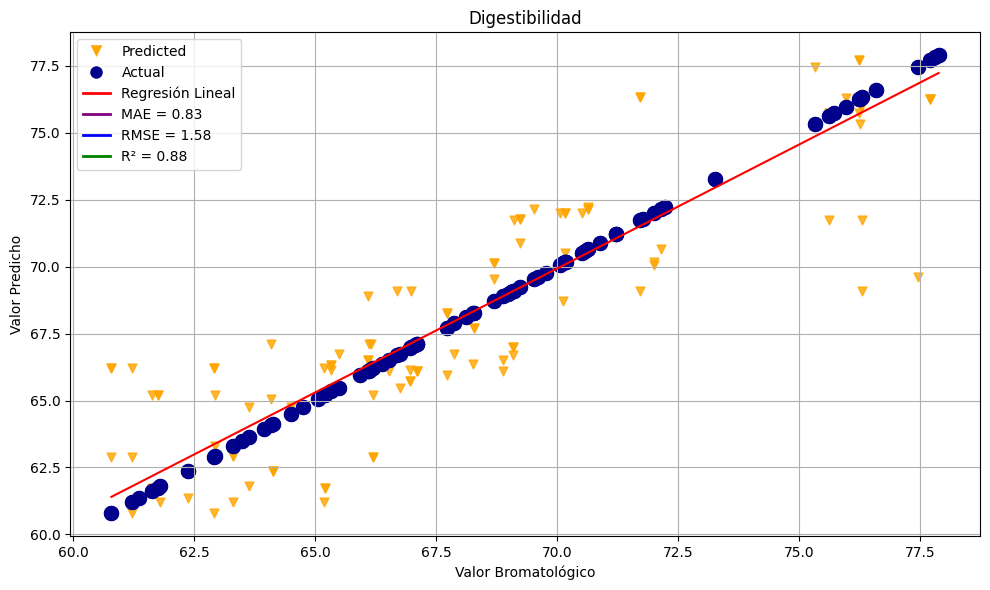

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Creamos los datos
data = {
    "actual": [
        67.103, 70.187, 76.313, 70.163, 76.585, 76.585, 60.789, 72.006, 75.332, 63.936, 63.936, 68.279,
        61.224, 68.889, 76.280, 75.733, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        70.163, 67.103, 71.725, 76.241, 69.042, 70.583, 62.904, 73.262, 62.904, 67.106, 71.725, 63.485,
        61.795, 65.061, 67.880, 68.701, 61.621, 62.375, 66.992, 70.163, 68.701, 61.354, 70.522, 76.264,
        76.241, 76.280, 66.958, 66.688, 60.789, 76.585, 70.647, 66.992, 67.106, 62.929, 65.484, 64.746,
        70.053, 66.201, 61.621, 77.718, 69.769, 66.958, 66.755, 68.254, 76.241, 68.120, 77.457, 69.526,
        72.153, 70.163, 65.199, 71.770, 75.733, 71.225, 65.199, 63.639, 69.615, 63.298, 75.628, 66.085,
        69.042, 65.188, 65.484, 68.120, 61.354, 61.224, 64.746, 66.165, 65.188, 66.688, 69.240, 68.889,
        65.199, 72.224, 67.722, 77.718, 65.188, 67.722, 77.817, 71.214, 63.298, 66.375, 71.214, 62.375,
        70.647, 68.980, 71.725, 64.124, 70.116, 64.746, 76.313, 64.124, 68.120, 66.375, 67.103, 66.755,
        64.124, 70.187, 62.929, 65.484, 77.817, 69.526, 69.102, 75.970, 66.118, 63.639, 70.163, 77.817,
        73.262, 61.621, 61.749, 73.262, 70.891, 61.749, 64.502, 65.938, 70.116, 65.338, 77.890, 75.970,
        61.354, 66.524, 67.074, 68.279, 72.006, 75.628, 75.332, 70.053, 63.639, 69.615, 76.264, 63.485,
        75.628, 68.889, 68.254, 77.890, 69.769, 75.733, 63.936, 77.457, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 66.085, 63.298, 61.749, 69.094, 67.074, 68.980, 64.095, 65.338, 66.992,
        70.187, 66.201, 65.938, 65.061, 67.106, 75.332, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        69.094, 72.006, 66.958, 70.053, 68.279, 77.890, 66.085, 69.240, 70.163, 72.153, 65.338, 68.254,
        69.042, 70.116, 62.929, 76.280, 70.583, 69.240, 61.224, 62.904, 64.095, 71.770, 67.722, 71.214,
        66.201, 69.102, 69.094, 66.165, 68.701, 64.095, 63.485, 77.718, 60.789, 70.522, 65.061, 70.583,
        72.153, 69.526, 66.118, 67.880, 70.647, 69.102, 61.795, 66.118, 71.225, 64.502, 71.225, 69.769,
        66.688, 76.313, 76.264
    ],
    "predicted": [
        66.118, 70.187, 71.725, 70.163, 76.585, 76.585, 62.904, 70.163, 75.332, 63.936, 63.936, 67.722,
        62.904, 66.085, 75.970, 75.628, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        72.006, 66.118, 76.313, 75.733, 69.042, 70.583, 66.201, 73.262, 60.789, 67.106, 76.313, 63.485,
        61.224, 65.061, 67.880, 70.116, 61.749, 61.354, 66.992, 70.522, 69.526, 61.354, 70.522, 76.264,
        77.718, 76.280, 65.743, 69.094, 66.201, 76.585, 72.224, 69.094, 67.106, 62.929, 65.484, 64.746,
        72.006, 62.904, 65.199, 76.241, 69.769, 65.743, 65.484, 68.254, 77.718, 68.120, 77.457, 69.526,
        70.647, 70.163, 65.199, 71.770, 75.733, 71.214, 61.749, 63.639, 69.615, 62.929, 71.725, 66.524,
        69.042, 61.224, 65.484, 68.120, 61.354, 60.789, 64.746, 66.165, 66.201, 66.688, 71.770, 68.889,
        61.749, 72.224, 68.279, 76.241, 65.188, 65.938, 77.817, 71.214, 61.224, 66.375, 71.225, 62.375,
        72.153, 68.980, 69.102, 62.375, 70.116, 64.746, 69.102, 62.375, 68.120, 66.375, 66.118, 66.755,
        62.375, 70.187, 63.298, 66.755, 77.89, 72.153, 69.102, 76.280, 66.118, 64.746, 70.163, 77.817,
        73.262, 61.621, 65.199, 73.262, 70.891, 65.199, 64.746, 65.938, 68.701, 66.31, 77.890, 75.970,
        61.354, 66.085, 67.074, 67.722, 72.006, 75.733, 75.332, 70.053, 61.795, 69.615, 76.264, 63.485,
        75.733, 66.524, 66.375, 77.890, 69.769, 75.733, 63.936, 69.615, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 68.889, 62.929, 61.621, 66.992, 67.074, 68.980, 64.095, 66.148, 66.992,
        70.187, 62.904, 65.938, 65.061, 67.106, 77.457, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        66.992, 70.053, 66.148, 70.053, 68.279, 77.890, 66.524, 71.770, 72.006, 72.153, 66.31, 68.254,
        69.042, 70.116, 65.199, 75.970, 70.583, 70.891, 66.201, 66.201, 65.061, 71.770, 68.279, 71.225,
        65.188, 69.102, 66.688, 67.103, 70.116, 67.103, 63.485, 76.241, 66.201, 72.006, 65.061, 70.583,
        72.153, 69.526, 67.103, 66.755, 72.153, 71.725, 61.795, 66.118, 71.214, 64.502, 71.214, 69.769,
        66.688, 76.313, 75.332
    ]
}


df = pd.DataFrame(data)

# Calcular MAE, RMSE y R²
mae = mean_absolute_error(df["actual"], df["predicted"])
rmse = np.sqrt(mean_squared_error(df["actual"], df["predicted"]))
r_squared = r2_score(df["actual"], df["predicted"])

# Cálculo de la regresión
coef = np.polyfit(df["actual"], df["predicted"], deg=1)
poly1d_fn = np.poly1d(coef)

# Gráfica
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df["actual"], df["predicted"], label="Predicted", marker="v", color="orange", s=40, alpha=0.8)
plt.scatter(df["actual"], df["actual"], label="Actual", marker="o", color="darkblue", s=100, alpha=0.8)

# Línea de regresión (color rojo)
x_vals = np.linspace(df["actual"].min(), df["actual"].max(), 100)
plt.plot(x_vals, poly1d_fn(x_vals), color="red", label="Regresión")

# Crear ítems manuales para la leyenda
legend_elements = [
    Line2D([0], [0], marker='v', color='w', label='Predicted', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='darkblue', markersize=10),
    Line2D([0], [0], color='red', lw=2, label='Regresión Lineal'),
    Line2D([0], [0], color='purple', lw=2, label=f'MAE = {mae:.2f}'),
    Line2D([0], [0], color='blue', lw=2, label=f'RMSE = {rmse:.2f}'),
    Line2D([0], [0], color='green', lw=2, label=f'R² = {r_squared:.2f}')
]

# Agregar la leyenda
plt.legend(handles=legend_elements, frameon=True, loc="upper left")

# Etiquetas y título
plt.title('Digestibilidad')
plt.xlabel('Valor Bromatológico')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.tight_layout()

# Mostrar la imagen (sin volver a graficar)
plt.show()

In [5]:
cd Escritorio/homero/homero/

/home/marcos/Escritorio/homero/homero


/home/marcos/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


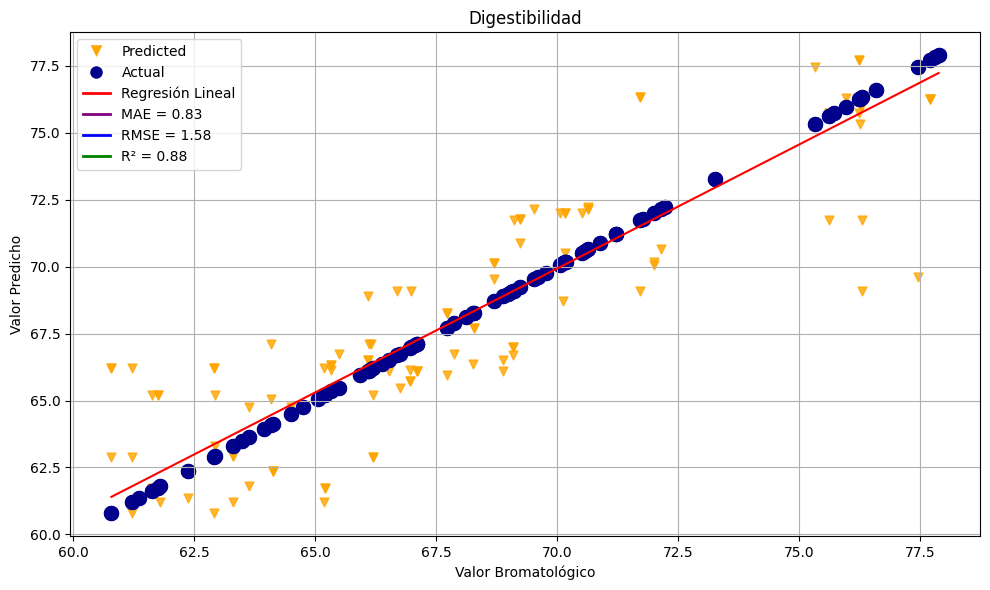

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Creamos los datos
data = {
    "actual": [
        67.103, 70.187, 76.313, 70.163, 76.585, 76.585, 60.789, 72.006, 75.332, 63.936, 63.936, 68.279,
        61.224, 68.889, 76.280, 75.733, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        70.163, 67.103, 71.725, 76.241, 69.042, 70.583, 62.904, 73.262, 62.904, 67.106, 71.725, 63.485,
        61.795, 65.061, 67.880, 68.701, 61.621, 62.375, 66.992, 70.163, 68.701, 61.354, 70.522, 76.264,
        76.241, 76.280, 66.958, 66.688, 60.789, 76.585, 70.647, 66.992, 67.106, 62.929, 65.484, 64.746,
        70.053, 66.201, 61.621, 77.718, 69.769, 66.958, 66.755, 68.254, 76.241, 68.120, 77.457, 69.526,
        72.153, 70.163, 65.199, 71.770, 75.733, 71.225, 65.199, 63.639, 69.615, 63.298, 75.628, 66.085,
        69.042, 65.188, 65.484, 68.120, 61.354, 61.224, 64.746, 66.165, 65.188, 66.688, 69.240, 68.889,
        65.199, 72.224, 67.722, 77.718, 65.188, 67.722, 77.817, 71.214, 63.298, 66.375, 71.214, 62.375,
        70.647, 68.980, 71.725, 64.124, 70.116, 64.746, 76.313, 64.124, 68.120, 66.375, 67.103, 66.755,
        64.124, 70.187, 62.929, 65.484, 77.817, 69.526, 69.102, 75.970, 66.118, 63.639, 70.163, 77.817,
        73.262, 61.621, 61.749, 73.262, 70.891, 61.749, 64.502, 65.938, 70.116, 65.338, 77.890, 75.970,
        61.354, 66.524, 67.074, 68.279, 72.006, 75.628, 75.332, 70.053, 63.639, 69.615, 76.264, 63.485,
        75.628, 68.889, 68.254, 77.890, 69.769, 75.733, 63.936, 77.457, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 66.085, 63.298, 61.749, 69.094, 67.074, 68.980, 64.095, 65.338, 66.992,
        70.187, 66.201, 65.938, 65.061, 67.106, 75.332, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        69.094, 72.006, 66.958, 70.053, 68.279, 77.890, 66.085, 69.240, 70.163, 72.153, 65.338, 68.254,
        69.042, 70.116, 62.929, 76.280, 70.583, 69.240, 61.224, 62.904, 64.095, 71.770, 67.722, 71.214,
        66.201, 69.102, 69.094, 66.165, 68.701, 64.095, 63.485, 77.718, 60.789, 70.522, 65.061, 70.583,
        72.153, 69.526, 66.118, 67.880, 70.647, 69.102, 61.795, 66.118, 71.225, 64.502, 71.225, 69.769,
        66.688, 76.313, 76.264
    ],
    "predicted": [
        66.118, 70.187, 71.725, 70.163, 76.585, 76.585, 62.904, 70.163, 75.332, 63.936, 63.936, 67.722,
        62.904, 66.085, 75.970, 75.628, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        72.006, 66.118, 76.313, 75.733, 69.042, 70.583, 66.201, 73.262, 60.789, 67.106, 76.313, 63.485,
        61.224, 65.061, 67.880, 70.116, 61.749, 61.354, 66.992, 70.522, 69.526, 61.354, 70.522, 76.264,
        77.718, 76.280, 65.743, 69.094, 66.201, 76.585, 72.224, 69.094, 67.106, 62.929, 65.484, 64.746,
        72.006, 62.904, 65.199, 76.241, 69.769, 65.743, 65.484, 68.254, 77.718, 68.120, 77.457, 69.526,
        70.647, 70.163, 65.199, 71.770, 75.733, 71.214, 61.749, 63.639, 69.615, 62.929, 71.725, 66.524,
        69.042, 61.224, 65.484, 68.120, 61.354, 60.789, 64.746, 66.165, 66.201, 66.688, 71.770, 68.889,
        61.749, 72.224, 68.279, 76.241, 65.188, 65.938, 77.817, 71.214, 61.224, 66.375, 71.225, 62.375,
        72.153, 68.980, 69.102, 62.375, 70.116, 64.746, 69.102, 62.375, 68.120, 66.375, 66.118, 66.755,
        62.375, 70.187, 63.298, 66.755, 77.89, 72.153, 69.102, 76.280, 66.118, 64.746, 70.163, 77.817,
        73.262, 61.621, 65.199, 73.262, 70.891, 65.199, 64.746, 65.938, 68.701, 66.31, 77.890, 75.970,
        61.354, 66.085, 67.074, 67.722, 72.006, 75.733, 75.332, 70.053, 61.795, 69.615, 76.264, 63.485,
        75.733, 66.524, 66.375, 77.890, 69.769, 75.733, 63.936, 69.615, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 68.889, 62.929, 61.621, 66.992, 67.074, 68.980, 64.095, 66.148, 66.992,
        70.187, 62.904, 65.938, 65.061, 67.106, 77.457, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        66.992, 70.053, 66.148, 70.053, 68.279, 77.890, 66.524, 71.770, 72.006, 72.153, 66.31, 68.254,
        69.042, 70.116, 65.199, 75.970, 70.583, 70.891, 66.201, 66.201, 65.061, 71.770, 68.279, 71.225,
        65.188, 69.102, 66.688, 67.103, 70.116, 67.103, 63.485, 76.241, 66.201, 72.006, 65.061, 70.583,
        72.153, 69.526, 67.103, 66.755, 72.153, 71.725, 61.795, 66.118, 71.214, 64.502, 71.214, 69.769,
        66.688, 76.313, 75.332
    ]
}


df = pd.DataFrame(data)

# Calcular MAE, RMSE y R²
mae = mean_absolute_error(df["actual"], df["predicted"])
rmse = np.sqrt(mean_squared_error(df["actual"], df["predicted"]))
r_squared = r2_score(df["actual"], df["predicted"])

# Cálculo de la regresión
coef = np.polyfit(df["actual"], df["predicted"], deg=1)
poly1d_fn = np.poly1d(coef)

# Gráfica
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df["actual"], df["predicted"], label="Predicted", marker="v", color="orange", s=40, alpha=0.8)
plt.scatter(df["actual"], df["actual"], label="Actual", marker="o", color="darkblue", s=100, alpha=0.8)

# Línea de regresión (color rojo)
x_vals = np.linspace(df["actual"].min(), df["actual"].max(), 100)
plt.plot(x_vals, poly1d_fn(x_vals), color="red", label="Regresión")

# Crear ítems manuales para la leyenda
legend_elements = [
    Line2D([0], [0], marker='v', color='w', label='Predicted', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Actual', markerfacecolor='darkblue', markersize=10),
    Line2D([0], [0], color='red', lw=2, label='Regresión Lineal'),
    Line2D([0], [0], color='purple', lw=2, label=f'MAE = {mae:.2f}'),
    Line2D([0], [0], color='blue', lw=2, label=f'RMSE = {rmse:.2f}'),
    Line2D([0], [0], color='green', lw=2, label=f'R² = {r_squared:.2f}')
]

# Agregar la leyenda
plt.legend(handles=legend_elements, frameon=True, loc="upper left")

# Etiquetas y título
plt.title('Digestibilidad')
plt.xlabel('Valor Bromatológico')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.tight_layout()

# Mostrar la imagen (sin volver a graficar)
plt.show()

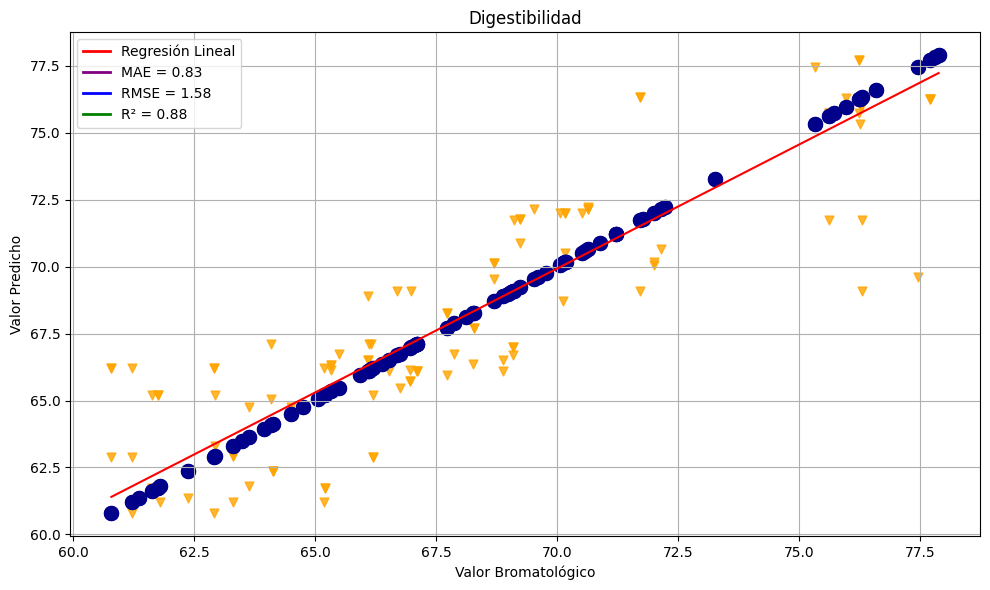

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Creamos los datos
data = {
    "actual": [
        67.103, 70.187, 76.313, 70.163, 76.585, 76.585, 60.789, 72.006, 75.332, 63.936, 63.936, 68.279,
        61.224, 68.889, 76.280, 75.733, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        70.163, 67.103, 71.725, 76.241, 69.042, 70.583, 62.904, 73.262, 62.904, 67.106, 71.725, 63.485,
        61.795, 65.061, 67.880, 68.701, 61.621, 62.375, 66.992, 70.163, 68.701, 61.354, 70.522, 76.264,
        76.241, 76.280, 66.958, 66.688, 60.789, 76.585, 70.647, 66.992, 67.106, 62.929, 65.484, 64.746,
        70.053, 66.201, 61.621, 77.718, 69.769, 66.958, 66.755, 68.254, 76.241, 68.120, 77.457, 69.526,
        72.153, 70.163, 65.199, 71.770, 75.733, 71.225, 65.199, 63.639, 69.615, 63.298, 75.628, 66.085,
        69.042, 65.188, 65.484, 68.120, 61.354, 61.224, 64.746, 66.165, 65.188, 66.688, 69.240, 68.889,
        65.199, 72.224, 67.722, 77.718, 65.188, 67.722, 77.817, 71.214, 63.298, 66.375, 71.214, 62.375,
        70.647, 68.980, 71.725, 64.124, 70.116, 64.746, 76.313, 64.124, 68.120, 66.375, 67.103, 66.755,
        64.124, 70.187, 62.929, 65.484, 77.817, 69.526, 69.102, 75.970, 66.118, 63.639, 70.163, 77.817,
        73.262, 61.621, 61.749, 73.262, 70.891, 61.749, 64.502, 65.938, 70.116, 65.338, 77.890, 75.970,
        61.354, 66.524, 67.074, 68.279, 72.006, 75.628, 75.332, 70.053, 63.639, 69.615, 76.264, 63.485,
        75.628, 68.889, 68.254, 77.890, 69.769, 75.733, 63.936, 77.457, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 66.085, 63.298, 61.749, 69.094, 67.074, 68.980, 64.095, 65.338, 66.992,
        70.187, 66.201, 65.938, 65.061, 67.106, 75.332, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        69.094, 72.006, 66.958, 70.053, 68.279, 77.890, 66.085, 69.240, 70.163, 72.153, 65.338, 68.254,
        69.042, 70.116, 62.929, 76.280, 70.583, 69.240, 61.224, 62.904, 64.095, 71.770, 67.722, 71.214,
        66.201, 69.102, 69.094, 66.165, 68.701, 64.095, 63.485, 77.718, 60.789, 70.522, 65.061, 70.583,
        72.153, 69.526, 66.118, 67.880, 70.647, 69.102, 61.795, 66.118, 71.225, 64.502, 71.225, 69.769,
        66.688, 76.313, 76.264
    ],
    "predicted": [
        66.118, 70.187, 71.725, 70.163, 76.585, 76.585, 62.904, 70.163, 75.332, 63.936, 63.936, 67.722,
        62.904, 66.085, 75.970, 75.628, 66.755, 71.770, 69.615, 66.375, 75.970, 68.980, 64.502, 70.891,
        72.006, 66.118, 76.313, 75.733, 69.042, 70.583, 66.201, 73.262, 60.789, 67.106, 76.313, 63.485,
        61.224, 65.061, 67.880, 70.116, 61.749, 61.354, 66.992, 70.522, 69.526, 61.354, 70.522, 76.264,
        77.718, 76.280, 65.743, 69.094, 66.201, 76.585, 72.224, 69.094, 67.106, 62.929, 65.484, 64.746,
        72.006, 62.904, 65.199, 76.241, 69.769, 65.743, 65.484, 68.254, 77.718, 68.120, 77.457, 69.526,
        70.647, 70.163, 65.199, 71.770, 75.733, 71.214, 61.749, 63.639, 69.615, 62.929, 71.725, 66.524,
        69.042, 61.224, 65.484, 68.120, 61.354, 60.789, 64.746, 66.165, 66.201, 66.688, 71.770, 68.889,
        61.749, 72.224, 68.279, 76.241, 65.188, 65.938, 77.817, 71.214, 61.224, 66.375, 71.225, 62.375,
        72.153, 68.980, 69.102, 62.375, 70.116, 64.746, 69.102, 62.375, 68.120, 66.375, 66.118, 66.755,
        62.375, 70.187, 63.298, 66.755, 77.89, 72.153, 69.102, 76.280, 66.118, 64.746, 70.163, 77.817,
        73.262, 61.621, 65.199, 73.262, 70.891, 65.199, 64.746, 65.938, 68.701, 66.31, 77.890, 75.970,
        61.354, 66.085, 67.074, 67.722, 72.006, 75.733, 75.332, 70.053, 61.795, 69.615, 76.264, 63.485,
        75.733, 66.524, 66.375, 77.890, 69.769, 75.733, 63.936, 69.615, 70.522, 72.224, 67.880, 61.795,
        70.891, 66.524, 77.457, 68.889, 62.929, 61.621, 66.992, 67.074, 68.980, 64.095, 66.148, 66.992,
        70.187, 62.904, 65.938, 65.061, 67.106, 77.457, 72.224, 67.074, 66.524, 62.375, 66.165, 65.938,
        66.992, 70.053, 66.148, 70.053, 68.279, 77.890, 66.524, 71.770, 72.006, 72.153, 66.31, 68.254,
        69.042, 70.116, 65.199, 75.970, 70.583, 70.891, 66.201, 66.201, 65.061, 71.770, 68.279, 71.225,
        65.188, 69.102, 66.688, 67.103, 70.116, 67.103, 63.485, 76.241, 66.201, 72.006, 65.061, 70.583,
        72.153, 69.526, 67.103, 66.755, 72.153, 71.725, 61.795, 66.118, 71.214, 64.502, 71.214, 69.769,
        66.688, 76.313, 75.332
    ]
}


df = pd.DataFrame(data)

# Calcular MAE, RMSE y R²
mae = mean_absolute_error(df["actual"], df["predicted"])
rmse = np.sqrt(mean_squared_error(df["actual"], df["predicted"]))
r_squared = r2_score(df["actual"], df["predicted"])

# Cálculo de la regresión
coef = np.polyfit(df["actual"], df["predicted"], deg=1)
poly1d_fn = np.poly1d(coef)

# Gráfica
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df["actual"], df["predicted"], label="Predicted", marker="v", color="orange", s=40, alpha=0.8)
plt.scatter(df["actual"], df["actual"], label="Actual", marker="o", color="darkblue", s=100, alpha=0.8)

# Línea de regresión (color rojo)
x_vals = np.linspace(df["actual"].min(), df["actual"].max(), 100)
plt.plot(x_vals, poly1d_fn(x_vals), color="red", label="Regresión")

# Crear ítems manuales para la leyenda
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Regresión Lineal'),
    Line2D([0], [0], color='purple', lw=2, label=f'MAE = {mae:.2f}'),
    Line2D([0], [0], color='blue', lw=2, label=f'RMSE = {rmse:.2f}'),
    Line2D([0], [0], color='green', lw=2, label=f'R² = {r_squared:.2f}')
]

# Agregar la leyenda
plt.legend(handles=legend_elements, frameon=True, loc="upper left")

# Etiquetas y título
plt.title('Digestibilidad')
plt.xlabel('Valor Bromatológico')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.tight_layout()

# Mostrar la imagen (sin volver a graficar) y guardar
plt.savefig("DIGESTIBILIDAD_HOMERO_100png", dpi=500, bbox_inches='tight')  
plt.show()